# Introduction to Pandas

Pandas is a Python library providing high-performance, easy-to-use data structures and data analysis tools. Pandas provides easy and powerful ways to import data from a variety of sources and export it to just as many. It is also explicitly designed to handle *missing data* elegantly which is a very common problem in data from the real world.

It can be used to perform the same tasks that you might use spreadsheets such as Excel for: columns of data being combined together with functions being applied to them and finally being displayed as a graph.

The offical [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) is very comprehensive and you will be able to answer a lot of questions in there, however, it can sometimes be hard to find the right page. Don't be afraid to use Google to find help.

We're going to start off with a quick overview of how we can use Pandas to read a file, ask some questions of it and plot the results. Then, in the next few chapters, we will dive into each of these topics in more detail.

## Reading in data

Pandas is not a core part of Python, but is a very commonly used 3rd-party package. If you have installed Python using Anaconda then it is bundled as part of it.
If you haven't, type `!conda install pandas` in your notebook, or omit the `!` if you are in your terminal

You can get access to Pandas by importing the `pandas` module. By convention, it is imported as `pd`:

In [3]:
import pandas as pd

Pandas provides functionality for reading in all sorts of file formats, including:
- Comma separated tables (or tab-separated or space-separated etc.)
- Excel spreadsheets
- HDF5 files
- SQL databases
- JSON files

Full information on reading and writing is available in the pandas manual on [IO tools](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

For now, we keep it simple and work with comma-separated-value (CSV) files and use the function [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html):

In [4]:
rain = pd.read_csv("./data/rain.csv")

This gives us the data from the file as a type of object called a `DataFrame`. This is the core of Pandas and we will be exploring many of the things that it can do throughout this course.

We can get Jupyter to display the data by putting the variable name in a cell by itself:

In [5]:
rain

,Cardiff,Stornoway,Oxford,Armagh
1853,NaN,NaN,57.7,53.0
1854,NaN,NaN,37.5,69.8
1855,NaN,NaN,53.4,50.2
1856,NaN,NaN,57.2,55.0
1857,NaN,NaN,61.3,64.6
...,...,...,...,...
2016,99.3,100.0,54.8,61.4
2017,85.0,103.1,48.1,60.7
2018,99.3,96.8,48.9,67.6
2019,119.0,105.6,60.5,72.7


So a `DataFrame` is a table of data, it has columns and rows. In this particular case, the data are the total monthly rainfall (in mm), averaged over each year for each of four cities.

We can see there are a few key parts of the output:

- Down the left-hand side in bold is the *index*. These can be thought of as being like row numbers, but can be more informational. In this case they are the year that the data refers to.

- Along the top are the column names. When we want to refer to a particular column in our `DataFrame`, we will use these names.

- The actual data is then arrayed in the middle of the table. Mostly these are data that we care about, but you will also see some `NaN`s in there as well. This is how Pandas represents *missing data*, in this case years for which there are no measurements.

## Data Analysis

Once we have our data, we can start asking questions of it. For example, if we want to find the mean rainfall for each column, we can call the `mean()` method on `rain`:

In [4]:
rain.mean()

Cardiff       97.400000
Stornoway    100.316892
Oxford        54.787500
Armagh        68.803571
dtype: float64

It is also possible to dive into the details of the data a bit more. We can ask for how many years was the average rainfall above 100 mm for each city:

In [5]:
rain[rain > 100].count()

Cardiff      13
Stornoway    74
Oxford        0
Armagh        1
dtype: int64

Don't worry about the exact syntax for the line above, we'll be covering this later in the course.

You can also extract a single column using Python's square bracket indexing syntax:

In [6]:
cardiff_rain = rain["Cardiff"]

In [7]:
cardiff_rain

1853      NaN
1854      NaN
1855      NaN
1856      NaN
1857      NaN
        ...  
2016     99.3
2017     85.0
2018     99.3
2019    119.0
2020    117.6
Name: Cardiff, Length: 168, dtype: float64

## Plotting data

Pandas provides some built-in methods for producing simple plots of your data. Using the `plot()` method on a `DataFrame` (along with specifying the x- and y-axis labels) can be done directly.

<Axes: xlabel='Date', ylabel='Average monthly rainfall (mm)'>

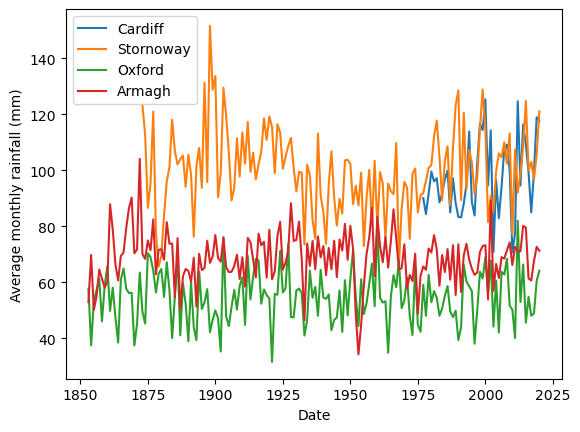

In [6]:
rain.plot(xlabel="Date", ylabel="Average monthly rainfall (mm)")

Over the next few chapters we will dive into more detail on each of the topics we've covered on this page.

In [11]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

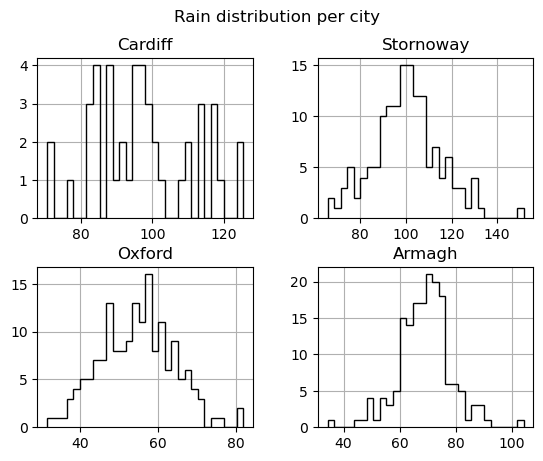

In [18]:
plt.figure()

rain.hist(histtype=u'step', edgecolor='k', bins=30)
plt.suptitle("Rain distribution per city")

plt.show()